<a href="https://colab.research.google.com/github/mtalhak003/Arduino-Car-Reverse-Parking-Sensor-Project/blob/main/agri_iot(machine_learning_model-2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# --- Step 1: Install missing libraries ---
!pip install xgboost lightgbm --quiet

In [2]:
# --- Step 2: Import Libraries ---
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [3]:
# --- Step 3: Upload Dataset ---
print("📂 Please upload your dataset (e.g., dataset.csv)")
uploaded = files.upload()
filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)

print("\n✅ Dataset loaded successfully!")
print(data.head())

📂 Please upload your dataset (e.g., dataset.csv)


Saving Greenhouse_updated.csv to Greenhouse_updated.csv

✅ Dataset loaded successfully!
   Soil Moisture  Soil_Temp   Humidity  Pump Data  Fan  Ventilation
0      63.077305  12.457884  25.252367          0    0            0
1      40.097357   8.514263  33.304246          1    0            0
2     100.141916  11.913326  24.072051          0    0            0
3      64.638742  14.700958  45.026218          0    1            1
4      97.964697   8.495549  41.490917          0    1            1


In [4]:
# --- Step 4: Define Features and Labels ---
X = data[['Soil Moisture', 'Soil_Temp', 'Humidity']]
Y = data[['Pump Data', 'Fan', 'Ventilation']]

In [5]:
# --- Step 5: Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [6]:
# --- Step 6: Define Models ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}

In [7]:
# --- Step 7: Train & Evaluate Models ---
results = {}

for name, model in models.items():
    clf = MultiOutputClassifier(model)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"\n=== {name} ===")
    print("Accuracy:", round(acc, 3))
    print(classification_report(y_test, preds))


=== Logistic Regression ===
Accuracy: 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       407
           1       1.00      1.00      1.00       635
           2       1.00      1.00      1.00       635

   micro avg       1.00      1.00      1.00      1677
   macro avg       1.00      1.00      1.00      1677
weighted avg       1.00      1.00      1.00      1677
 samples avg       0.53      0.53      0.53      1677


=== Decision Tree ===
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       407
           1       1.00      1.00      1.00       635
           2       1.00      1.00      1.00       635

   micro avg       1.00      1.00      1.00      1677
   macro avg       1.00      1.00      1.00      1677
weighted avg       1.00      1.00      1.00      1677
 samples avg       0.53      0.53      0.53      1677



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/me


=== XGBoost ===
Accuracy: 0.998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       407
           1       1.00      1.00      1.00       635
           2       1.00      1.00      1.00       635

   micro avg       1.00      1.00      1.00      1677
   macro avg       1.00      1.00      1.00      1677
weighted avg       1.00      1.00      1.00      1677
 samples avg       0.53      0.53      0.53      1677

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1572, number of negative: 5436
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000542 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 7008, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.224315 -> initscore=-1.240695
[LightGBM] [Info]

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/me


=== KNN ===
Accuracy: 0.983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       407
           1       0.97      0.98      0.98       635
           2       0.97      0.98      0.98       635

   micro avg       0.98      0.99      0.98      1677
   macro avg       0.98      0.99      0.98      1677
weighted avg       0.98      0.99      0.98      1677
 samples avg       0.52      0.53      0.52      1677


=== SVM ===
Accuracy: 0.997
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       407
           1       1.00      1.00      1.00       635
           2       1.00      1.00      1.00       635

   micro avg       1.00      1.00      1.00      1677
   macro avg       1.00      1.00      1.00      1677
weighted avg       1.00      1.00      1.00      1677
 samples avg       0.53      0.53      0.53      1677



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


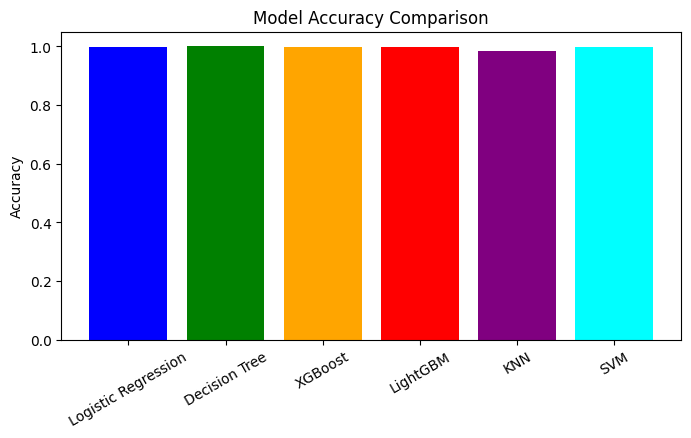

In [8]:
# --- Step 8: Compare Model Accuracies ---
plt.figure(figsize=(8,4))
plt.bar(results.keys(), results.values(), color=['blue','green','orange','red','purple','cyan'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=30)
plt.show()

In [9]:
# --- Step 9: Display Best Model ---
best_model = max(results, key=results.get)
print(f"\n🏆 Best Model: {best_model} with Accuracy = {round(results[best_model], 3)}")


🏆 Best Model: Decision Tree with Accuracy = 1.0


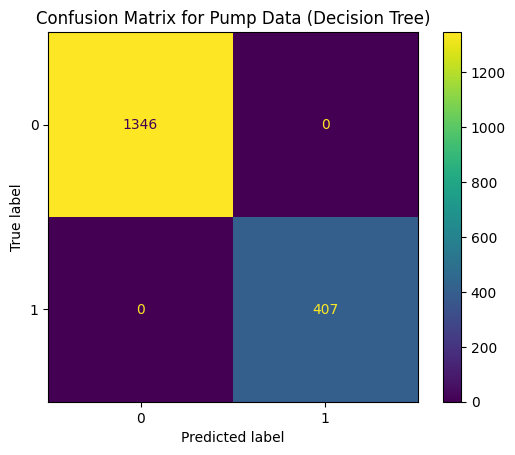

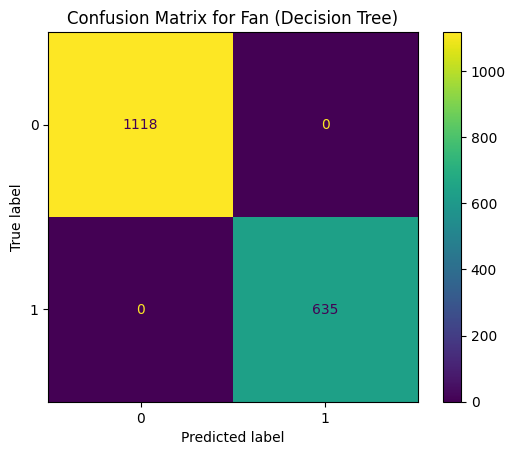

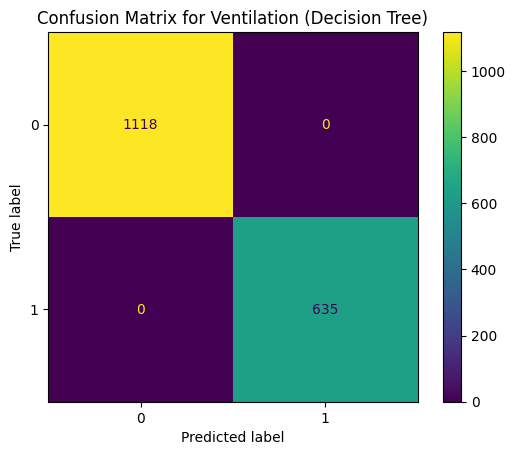

In [10]:
# --- Step 10: Display Confusion Matrix for Best Model ---
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get the best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

# Train the best model on the full training data
clf = MultiOutputClassifier(best_model)
clf.fit(X_train, y_train)

# Make predictions on the test set
preds = clf.predict(X_test)

# Calculate and display confusion matrix for each output
for i, label in enumerate(Y.columns):
    cm = confusion_matrix(y_test.iloc[:, i], preds[:, i])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix for {label} ({best_model_name})')
    plt.show()

In [16]:
# --- Step 11: Create an Input/Output Interface for the Best Model ---

# Get the best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

# Retrain the best model on the full dataset if needed (optional, but good practice for final predictions)
# clf = MultiOutputClassifier(best_model)
# clf.fit(X, Y) # Use the full dataset X and Y

# For demonstration purposes, we'll use the model trained on the training data (clf from Step 10)
# Make sure cell Slb_zjEhBMjN has been run

print(f"--- Input Interface for {best_model_name} ---")

# Get input from the user
soil_moisture = float(input("Enter Soil Moisture: "))
soil_temp = float(input("Enter Soil Temp: "))
humidity = float(input("Enter Humidity: "))

# Create a DataFrame for the input
input_data = pd.DataFrame([[soil_moisture, soil_temp, humidity]], columns=['Soil Moisture', 'Soil_Temp', 'Humidity'])

# Make predictions
predictions = clf.predict(input_data)

print("\n--- Predictions ---")
for i, label in enumerate(Y.columns):
    print(f"{label}: {predictions[0][i]}")

--- Input Interface for Decision Tree ---
Enter Soil Moisture: 99.98765432
Enter Soil Temp: 9.09876543
Enter Humidity: 45.98765432

--- Predictions ---
Pump Data: 0
Fan: 1
Ventilation: 1
